https://mlschool.speechpro.ru/core/results

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import pandas as pd
import numpy as np

import os
from tqdm import tqdm
from utils import save_obj, load_obj

meta_pth = '/media/grigory/Диск/ITMO_DATA/data_v_7_stc/meta/meta.txt'
train_audio_pth = '/media/grigory/Диск/ITMO_DATA/data_v_7_stc/audio'
test_audio_pth = '/media/grigory/Диск/ITMO_DATA/data_v_7_stc/test'

extracted_data = 'data/extracted'
if not os.path.exists(extracted_data):
    os.mkdir(extracted_data)
extracted_train = 'features_labels_train'
extracted_test = 'features_labels_test'

In [19]:
from audio_utils import load_audio, mean_features, cnn_features, seq_features

def parse_audio_files(audio_path, limit=None, 
                      extractor=mean_features,
                      stack_first_dim=True,
                     **extractor_args):
    features = []
    names = []
    total = len(list(os.scandir(audio_path)))
    for i, t in enumerate(tqdm(os.scandir(audio_path), total=total)):
        fpth, name = t.path, t.name
        # для дебага
        if limit and i >= limit: break
        try:
            ftrz = extractor(fpth, **extractor_args)
            if stack_first_dim:
                features.append(ftrz)
                names.append(name)
            else:
                features.extend(ftrz)
                names.extend([name]*ftrz.shape[0])
        except Exception as e:  # да, baseException это плохо
            print(e)
            print("Error processing " + fpth + " - skipping")
    return np.array(features), np.array(names)


In [20]:
meta_df = pd.read_csv(meta_pth, sep='\t', header=None)
meta_df.columns = ['name', 'env', 'start_tmstp', 'end_tmstp', 'label']

Проверяем соотвествие между метками в названии и метками в отдельной колонке

In [21]:
set(pd.Series(os.listdir(train_audio_pth)).apply(lambda x: x.split('_')[0]).value_counts().index.values)

{'background',
 'bags',
 'bg',
 'd',
 'door',
 'k',
 'keyboard',
 'knocking',
 'ring',
 'speech',
 't',
 'tool',
 'tt'}

In [22]:
set(pd.Series(os.listdir(test_audio_pth)).apply(lambda x: x.split('_')[0]).value_counts().index.values)

{'background',
 'bags',
 'door',
 'keyboard',
 'knocking',
 'ring',
 'speech',
 'tool',
 'unknown'}

видно, что в тесте, в отличие от трейна, нету "битых" меток в именах файлов, так что можно не заморачиваться с  их исправлением в трейне

### Извлекаем признаки

train

In [21]:
ftrs, names = parse_audio_files(train_audio_pth,
                               stack_first_dim=False)
labels = meta_df.set_index('name').loc[names]['label'].values
# упаковываем в pickle
save_obj((ftrs, names, labels), os.path.join(extracted_data, extracted_train))

In [23]:
ftrs, names = parse_audio_files(test_audio_pth,
                               stack_first_dim=False,)
# упаковываем в pickle
save_obj((ftrs, names), os.path.join(extracted_data, extracted_test))

признаки для CNN сети
```python3
MemoryError
```

In [24]:
# ftrs, names = parse_audio_files(train_audio_pth, 
#                                 stack_first_dim=False,
#                                 extractor=cnn_features)
# save_obj((ftrs, names), os.path.join(extracted_data, extracted_train))

# ftrs, names = parse_audio_files(test_audio_pth, 
#                                 stack_first_dim=False,
#                                 extractor=cnn_features)
# save_obj((ftrs, names, labels), os.path.join(extracted_data, extracted_test))

признаки для LSTM-ки

In [33]:
# ftrs, names = parse_audio_files(train_audio_pth, 
#                                 stack_first_dim=False,
#                                 extractor=seq_features)
# labels = meta_df.set_index('name').loc[names]['label'].values
# save_obj((ftrs, names, labels), os.path.join(extracted_data, extracted_train))

# ftrs, names = parse_audio_files(test_audio_pth, 
#                                 stack_first_dim=False,
#                                 extractor=seq_features)
# labels = meta_df.set_index('name').loc[names]['label'].values
# save_obj((ftrs, names, labels), os.path.join(extracted_data, extracted_test))

100%|██████████| 610/610 [01:40<00:00,  6.06it/s]
/home/grigory/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # Remove the CWD from sys.path while we load stuff.


____

In [ ]:
# ftr,labels = load_obj(os.path.join(extracted_data, 'features_labels'))

Populating the interactive namespace from numpy and matplotlib


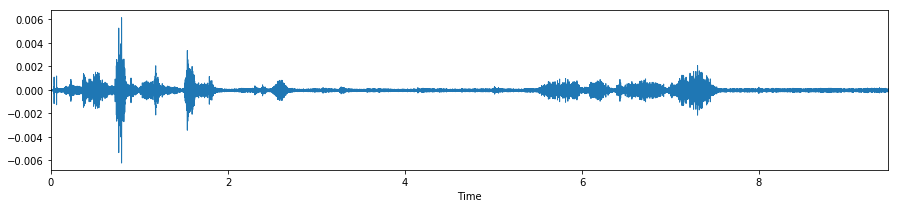

In [43]:
# import librosa
# import librosa.display
# %pylab inline
# y, sr = librosa.load('/media/grigory/Диск/ITMO_DATA/data_v_7_stc/audio/background_0001.wav', duration=10)
# plt.figure(figsize=(15,10))
# plt.subplot(3, 1, 1)

# librosa.display.waveplot(y, sr=sr);